In [2]:
from econml.dml import LinearDML
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import (Lasso, LassoCV, ElasticNetCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor,RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from model_selection import SearchEstimatorList
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
url = "https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv"
ihdp_df = pd.read_csv(url)
print(ihdp_df.columns)
ihdp_df.head()

Index(['1', '5.59991628549083', '4.31877968420119', '3.26825638455712',
       '6.8544566863328', '-0.528602821749802', '-0.343454502314042',
       '1.12855393123738', '0.161702527138546', '-0.316603181521744',
       '1.29521593563369', '1.1', '0', '1.2', '0.1', '0.2', '0.3', '0.4',
       '1.3', '0.5', '1.4', '1.5', '1.6', '1.7', '0.6', '0.7', '0.8', '0.9',
       '0.10', '0.11'],
      dtype='object')


,1,5.59991628549083,4.31877968420119,3.26825638455712,6.8544566863328,-0.528602821749802,-0.343454502314042,1.12855393123738,0.161702527138546,-0.316603181521744,...,1.4,1.5,1.6,1.7,0.6,0.7,0.8,0.9,0.10,0.11
0,0,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
1,0,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
2,0,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
3,0,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0
4,0,4.762090,8.264795,4.707898,7.219442,0.467901,-0.202946,-0.733261,0.161703,0.058500,...,1,1,1,1,0,0,0,0,0,0


In [4]:
col =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1","x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25"]
ihdp_df.columns = col
ihdp_df = ihdp_df.astype({"treatment":'bool'}, copy=False)
ihdp_df.head()
# print(type(ihdp_df))

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
1,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
2,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
3,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0
4,False,4.762090,8.264795,4.707898,7.219442,0.467901,-0.202946,-0.733261,0.161703,0.058500,...,1,1,1,1,0,0,0,0,0,0


In [5]:
#Check for null values
ihdp_df.isnull().sum()

treatment     0
y_factual     0
y_cfactual    0
mu0           0
mu1           0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x16           0
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
dtype: int64

In [6]:
# scaler = StandardScaler()
# ihdp_df_normalized = pd.DataFrame(scaler.fit_transform(ihdp_df), columns=ihdp_df.columns)

In [7]:
#Explore Categorical variables
categorical = [var for var in ihdp_df.columns if ihdp_df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [8]:
#Explore numerical variables
numerical = [var for var in ihdp_df.columns if ihdp_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 30 numerical variables

The numerical variables are : ['treatment', 'y_factual', 'y_cfactual', 'mu0', 'mu1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']


In [21]:
#Assign the Treatment, Features and Outcome variables with their respective columns
#Column y_cfactual gives the outcome that would have been observed if treatment was not given.
T = ihdp_df['treatment']
feature_cols = ["mu0", "mu1", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25"]
X = ihdp_df[feature_cols]

#Column y_factual gives the observed Bayley Mental Development Index score
Y = ihdp_df['y_factual']

# X_train, X_test = train_test_split(X, test_size=0.2)
Y_train, Y_test, T_train, T_test, X_train, X_test = train_test_split(Y, T, X, test_size=0.2)

# X_train_ = np.concatenate((X_train, T_train.reshape(-1, 1)), axis=1)
# X_test_ = np.concatenate((X_test, T_test.reshape(-1, 1)), axis=1)


In [23]:
est = LinearDML(model_y='auto', model_t='auto', discrete_treatment=True, linear_first_stages=False, random_state=42)
est.fit(Y_train, T_train, X=X_train, W=None)
te_pred = est.effect(X_test)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase 

In [26]:
params = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05, 1, 2, 3, 4, 5, 6, 7, 8, 9]
}
model_y = RandomForestRegressor()
grid_search = GridSearchCV(model_y, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params_y = grid_search.best_params_
best_model_y = grid_search.best_estimator_
print(best_model_y)

model_t = RandomForestClassifier()
grid_search = GridSearchCV(model_t, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, T_train)
best_params_t = grid_search.best_params_
best_model_t = grid_search.best_estimator_
print(best_model_t)

est1 = LinearDML(model_y=best_model_y, model_t=best_model_t, discrete_treatment=True, linear_first_stages=False, random_state=42)
est1.fit(Y_train, T_train, X=X_train, W=None)
te_pred1 = est1.effect(X_test)

KeyboardInterrupt: 

In [173]:
# params = {
#     # 'alphas' : np.logspace(np.log10(0.001), np.log10(20), num=8),
#     # 'alphas': [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]
#     # 'max_iter': [1000, 10000]
#     'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
#     'alphas': np.logspace(-4, 2, 20)
# }
alphas = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

params1 = {
    'Cs': [1/0.001, 1/0.01, 1/0.1, 1/0.5, 1, 1/2, 1/10, 1/20],
    'max_iter': [1000, 10000]
}
best_model_y = ElasticNetCV(alphas=alphas)
# grid_search = GridSearchCV(model_y, param_grid=params, cv=5)
# grid_search.fit(X_train, Y_train)
# best_params_y = grid_search.best_params_
# best_model_y = grid_search.best_estimator_
# print(best_model_y)

model_t = LogisticRegressionCV()
grid_search = GridSearchCV(model_t, param_grid=params1, cv=5, n_jobs=-1)
grid_search.fit(X_train, T_train)
best_params_t = grid_search.best_params_
best_model_t = grid_search.best_estimator_
print(best_model_t)

est2 = LinearDML(model_y=best_model_y, model_t=best_model_t, discrete_treatment=True, linear_first_stages=False, random_state=42)
est2.fit(Y_train, T_train, X=X_train, W=None)
te_pred2 = est2.effect(X_test)


70 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shrut\OneDrive\Desktop\EconML-CS696DS\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shrut\OneDrive\Desktop\EconML-CS696DS\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1760, in fit
    self._validate_params()
  File "c:\Users\shrut\OneDrive\Desktop\EconML-CS696DS\.venv\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\shrut\OneDrive\Desktop\EconML-CS696DS\.venv\li

LogisticRegressionCV(Cs=1, max_iter=1000)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Co-variance matrix is underdetermined. Inference will be invalid!


In [185]:
params = {
    "n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 1]
}
model_y = GradientBoostingRegressor()
grid_search = GridSearchCV(model_y, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params_y = grid_search.best_params_
best_model_y = grid_search.best_estimator_
print(best_model_y)

model_t = GradientBoostingClassifier()
grid_search = GridSearchCV(model_t, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, T_train)
best_params_t = grid_search.best_params_
best_model_t = grid_search.best_estimator_
print(best_model_t)

est3 = LinearDML(model_y=best_model_y, model_t=best_model_t, discrete_treatment=True, linear_first_stages=False, random_state=42)
est3.fit(Y_train, T_train, X=X_train, W=None)
te_pred3 = est3.effect(X_test)

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, min_samples_split=5,
                          n_estimators=700)
GradientBoostingClassifier(learning_rate=0.001, max_depth=2,
                           min_samples_split=5)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Co-variance matrix is underdetermined. Inference will be invalid!


In [197]:
params = {
    # 'hidden_layers': [1, 2],
    'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
    'learning_rate_init': [0.0001, 0.001],
    'batch_size': [32, 64, 128, 250]
}
model_y = MLPRegressor()
grid_search = GridSearchCV(model_y, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params_y = grid_search.best_params_
best_model_y = grid_search.best_estimator_
print(best_model_y)

model_t = MLPClassifier()
grid_search = GridSearchCV(model_t, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, T_train)
best_params_t = grid_search.best_params_
best_model_t = grid_search.best_estimator_
print(best_model_t)

est4 = LinearDML(model_y=best_model_y, model_t=best_model_t, discrete_treatment=True, linear_first_stages=False, random_state=42)
est4.fit(Y_train, T_train, X=X_train, W=None)
te_pred4 = est4.effect(X_test)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor(batch_size=64, hidden_layer_sizes=64, learning_rate_init=0.0001)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


MLPClassifier(batch_size=32, hidden_layer_sizes=32, learning_rate_init=0.0001)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Co-variance matrix is underdetermined. Inference will be invalid!


In [ ]:
params = {
    # 'hidden_layers': [1, 2],
    'hidden_layer_sizes': [4, 8, 16, 32, 64, 128],
    'learning_rate_init': [0.0001, 0.001],
    'batch_size': [32, 64, 128, 250]
}
model_y = MLPRegressor()
grid_search = GridSearchCV(model_y, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_params_y = grid_search.best_params_
best_model_y = grid_search.best_estimator_
print(best_model_y)

model_t = MLPClassifier()
grid_search = GridSearchCV(model_t, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(X_train, T_train)
best_params_t = grid_search.best_params_
best_model_t = grid_search.best_estimator_
print(best_model_t)

est4 = LinearDML(model_y=best_model_y, model_t=best_model_t, discrete_treatment=True, linear_first_stages=False, random_state=42)
est4.fit(Y_train, T_train, X=X_train, W=None)
te_pred4 = est4.effect(X_test)

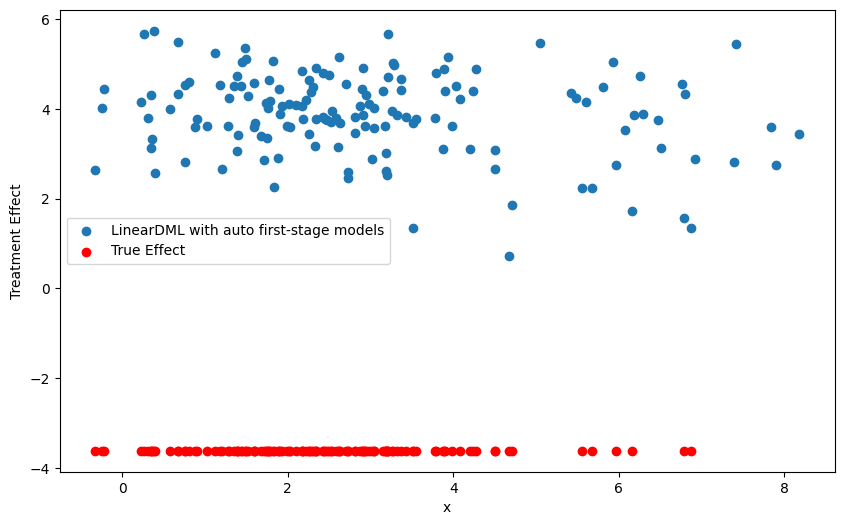

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, te_pred, label='LinearDML with auto first-stage models')
# plt.scatter(Y_test, te_pred1, label='LinearDML with Random Forest first-stage models')
# plt.scatter(Y_test, te_pred2, label='LinearDML with Linear first-stage models')
# plt.scatter(Y_test, te_pred3, label='LinearDML with Gradient Boosting first-stage models')
# plt.scatter(Y_test, te_pred4, label='LinearDML with Neural Networks first-stage models')
te_true = Y_test[T_test == True].mean() - Y_test[T_test == False].mean()
plt.scatter(Y_test[T_test == False], np.zeros_like(Y_test[T_test == False]) - te_true, color='red', label='True Effect')
plt.ylabel('Treatment Effect')
plt.xlabel('x')
plt.legend()
plt.show()

In [199]:
score={}
score["LinearDML with auto first-stage models"] = est.score(Y_test, T_test, X_test)
score["LinearDML with Random Forest first-stage models"] = est1.score(Y_test, T_test, X_test)
score["LinearDML with Linear first-stage models"] = est2.score(Y_test, T_test, X_test)
score["LinearDML with Gradient Boosting first-stage models"] = est3.score(Y_test, T_test, X_test)
score["LinearDML with Neural Networks first-stage models"] = est4.score(Y_test, T_test, X_test)
score

{'LinearDML with auto first-stage models': 1.3957488005531276,
 'LinearDML with Random Forest first-stage models': 1.3147824035317122,
 'LinearDML with Linear first-stage models': 1.3622069797461647,
 'LinearDML with Gradient Boosting first-stage models': 1.5981875810583352,
 'LinearDML with Neural Networks first-stage models': 1.4460264382685382}

In [200]:
print("best model selected by score: ",min(score,key=lambda x: score.get(x)))

best model selected by score:  LinearDML with Random Forest first-stage models


In [201]:
mse_te = {}
mse_te['LinearDML with auto first-stage models'] = np.mean((Y_test - te_pred)**2)
mse_te['LinearDML with Random Forest first-stage models'] = np.mean((Y_test - te_pred1)**2)
mse_te['LinearDML with Linear first-stage models'] = np.mean((Y_test - te_pred2)**2)
mse_te['LinearDML with Gradient Boosting first-stage models'] = np.mean((Y_test - te_pred3)**2)
mse_te['LinearDML with Neural Networks first-stage models'] = np.mean((Y_test - te_pred4)**2)
mse_te

{'LinearDML with auto first-stage models': 8.13159312074027,
 'LinearDML with Random Forest first-stage models': 9.230302488828961,
 'LinearDML with Linear first-stage models': 8.27422578568749,
 'LinearDML with Gradient Boosting first-stage models': 8.687611337099003,
 'LinearDML with Neural Networks first-stage models': 8.935276689936945}

In [202]:
print("best model selected by MSE of TE: ", min(mse_te, key=lambda x: mse_te.get(x)))

best model selected by MSE of TE:  LinearDML with auto first-stage models
